In [46]:
from functions import *

# Students

---

## Student Info
---

The student info file contains details about students including the module they took, the presentation they took the module during, demographic information and the final result of their studies.

In [47]:
# looking at the stud_info dataframe
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


**Size**

In [48]:
# get size counts of stud_info
get_size(stud_info)

,Count
Columns,14
Rows,32593


In [49]:
md(f'''
Student Info has {len(stud_info.columns)} features and {"{:,}".format(len(stud_info))} student records.
''')


Student Info has 14 features and 32,593 student records.


### Student Info Contents

* **code_module**: The code module represents the course the student is taking.
* **code_presentation**: The code presentations are the year and semester the student is taking the course.
* **id_student**: The student ID is a unique identifier for each student
* **gender**: The gender represents the binary gender of a student 'M' for students who identify as male and 'F' for students who identify as female.
* **region**: Region represents the location of the student when they took the module. All regions are in the UK, Scotland, Ireland or Wales.
* **highest_education**: Highest education is representative of a students highest level of formal academic achievement.
    - Education levels in order from least to most formal education: 
        - No formal quals (qualifications)
        - Lower than A Level which is nearly but not quite analagous to under high school level
        - A Level or equivalent which is again nearly analagous to high school level, but more like college ready
        - HE Qualification which stands for higher education qualification
        - Post Graduate Qualification
* **imd_band**: The imd_band represents the Indices of multiple deprivation (IMD) score which is a commonly used method in the UK to measure poverty or deprivation in an area. The lower the score, the more 'deprived' the area is.
* **age_band**: There are only three bins for age; _0-35_, _35-55_ and _55<=_
* **num_of_prev_attempts**: The number of times the student has attempted the course previously.
* **studied_credits**: The number of credits for the module the student is taking.
* **disability**: Disability status is represented by a binary 'Y', yes a student does identify as having a disability and 'N', no a student does not identify as having a disability.
* **final_results**: * The final result is the students overall result in the class.
    - Possible Results include:
         - _Pass_: The student passed the course
         - _Fail_: The student did not pass the course
         - _Withdraw_: The student withdrew before the course term ended
         - _Distinction_: The student passed the class with distinction

## Student Registration Dataframe

---

The information that the student registration file adds includes the dates that students registered and, if applicable, unregistered from the module.

In [50]:
# looking at the student_registration dataframe
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


**Size**

In [51]:
get_size(student_registration)

,Count
Columns,5
Rows,32593


In [52]:
md(f''' 
Student Registration has {len(student_registration.columns)} features and {"{:,}".format(len(student_registration))} student records.
''')

 
Student Registration has 5 features and 32,593 student records.


### Student Registration Contents

* **code_module**: The code module represents the course which the sutdent registered for.
* **code_presentation**: The code presentation represents the time of year the course which the student registered for began.
* **id_student**: The student ID is the unique identifier for each student.
* **date_registration**: The registration date is the date that the student registered for the module relative to the start of the module. A negative value indicates that many days before the module began.
* **date_unregistration**: The unregistration date is the date that the student unregistered from the course module in relation to the start date of the course, if applicable.

---

### Student Info Exploration and Cleaning

In [53]:
# list of result possibilities
results = ['Pass', 'Fail', 'Withdrawn', 'Distinction']

# list of disability possibilities
disabilities = ['N', 'Y']

# list of region possibilities
regions = ['East Anglian Region', 'North Western Region',
 'South East Region', 'West Midlands Region', 'North Region',
 'South Region', 'South West Region', 'East Midlands Region',
 'Yorkshire Region', 'London Region', 'Wales', 'Scotland', 'Ireland']

# list of education possibilities
educations = ['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent', 'HE Qualification', 'Post Graduate Qualification' ]

# list of imd possibilites
imds = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# list of age_band possibilities
ages = ['0-35', '35-55', '55<=']

# list of presentation possibilities
presentations = ['2013B', '2013J', '2014B', '2014J']

# list of module possibilities
modules = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']

# list of gender possibilities
genders = ['M', 'F']

# dictionary mapping column string names to the above lists to pass to the change_col_val function
col_dict = {'imd':imds, 'region':regions, 'disability':disabilities, 'age_band':ages, 'module':modules, 'highest_education':educations, 'gender':genders, 'final_result':results}

```{note}
* The student registration dataframe matches 1:1 with the student info dataframe only adding the date the student registered and the date in which they unregistered, and so we will merge these two dataframes.
* The dataframe columns can then be reordered to keep relevent data together. 
```

In [54]:
# outer join and merge student info with student registration
stud_info = student_info.merge(student_registration, how='outer', on=['code_module', 'code_presentation', 'id_student'], indicator=True)

# reordering the stud_info dataframe to keep country, module and student data together
stud_info = stud_info[['code_module', 'code_presentation', 'id_student', 'region', 'imd_band', 'age_band', 'gender', 'highest_education', 'disability', 'num_of_prev_attempts', 'studied_credits', 'final_result', 'date_registration', 'date_unregistration']]

* Column names will be changed to be less verbose
    * code_module to module
    * code_presentation to presentation
    * highest_education to education
    * imd_band to imd
    * age_band to age
    * num_of_prev_attempts to attempts
    * studied_credits to credits
    * final result to result
* 'Y' and 'N' in disability will be changed to boolean for ease of manipulation

In [55]:
# rename num_of_prev_attempts column to prev_attempts to save space
stud_info_rename = {'code_module':'module', 'code_presentation':'presentation', 'final_result':'result', 'studied_credits':'credits', 'age_band':'age', 'num_of_prev_attempts':'attempts', 'highest_education':'education', 'imd_band':'imd'}
stud_info = stud_info.rename(columns=stud_info_rename)
stud_info = stud_info.replace({'disability':{'Y':True, 'N':False}})

**Data Types**

In [56]:
# show student info data types
get_dtypes(stud_info)

index,Type
module,object
presentation,object
id_student,int64
region,object
imd,object
age,object
gender,object
education,object
disability,bool
attempts,int64


* `id_student` is currently `int64` datatype, but will be changed to `string` as it as categorical.
* `object` datatypes can have unexpected behavior and will be recast to `string`


In [57]:
# changing id_student to the object data type
stud_info['id_student'] = stud_info['id_student'].astype(str)
stud_info = stud_info.convert_dtypes()
get_dtypes(stud_info)

index,Type
module,string
presentation,string
id_student,string
region,string
imd,string
age,string
gender,string
education,string
disability,boolean
attempts,Int64


**Null Values**

In [58]:
null_vals(stud_info)

index,Null Values
module,0
presentation,0
id_student,0
region,0
imd,1111
age,0
gender,0
education,0
disability,0
attempts,0


In [59]:
# store sum of imd null values
imd_null = stud_info['imd'].isnull().sum()

# store the sum of null values of date_registration
null_registration = student_registration['date_registration'].isnull().sum()

# store the sum of null values of date_unregistration
null_unregistration = student_registration['date_unregistration'].isnull().sum()

# locate where stud_info has a result of withdrawn and a date_unregistration of NA
withdrawn_na = stud_info.loc[(stud_info['result'] == 'Withdrawn') & (stud_info['date_unregistration'].isna())]


md(f'''
* The `imd` variable has {"{:,}".format(imd_null)} null values. For these, we will find the most common imd band for each region and assert that as the value.
* We have {null_registration} null values for date_registration, and no mention of this in the dataset documentation, so we will treat this as missing data.
* There are {"{:,}".format(null_unregistration)} null values for `date_unregistration` which represent the students that did not withdraw from the course.
    * Not every withdrawn student has a date that they unregistered. There are {len(withdrawn_na)} entries of students with a `Withdrawn` result but a `date_unregstration` of `<NA>`''')


* The `imd` variable has 1,111 null values. For these, we will find the most common imd band for each region and assert that as the value.
* We have 45 null values for date_registration, and no mention of this in the dataset documentation, so we will treat this as missing data.
* There are 22,521 null values for `date_unregistration` which represent the students that did not withdraw from the course.
    * Not every withdrawn student has a date that they unregistered. There are 93 entries of students with a `Withdrawn` result but a `date_unregstration` of `<NA>`

In [60]:
# initiate a dictionary for {region:imd}
common_imds = {}

# iterate through regions list found above
for i in regions:
    # locate the imds for each region in stud_info
    region_imds = stud_info.loc[stud_info['region'] == i, 'imd']
    # get the value_counts for the regions imds and add the highest count to a dict keyed by region
    common_imds[i] = region_imds.value_counts().idxmax()

# iterate through a sub dataframe of stud_info where imd is NA
for index, row in stud_info[stud_info['imd'].isna()].iterrows():
    # set the imd at the index of the sub dataframe to the key of the region in the dict in the main dataframe
    stud_info.at[index, 'imd'] = common_imds[row['region']]

**Duplicate Values**

In [61]:
# show duplicate values in student info if any
get_dupes(stud_info)

There are no Duplicate Values

**Unique Counts**

In [62]:
# Get number of unique values per variable in student info
count_unique(stud_info)

index,Count
module,7
presentation,4
id_student,28785
region,13
imd,10
age,3
gender,2
education,5
disability,2
attempts,7


In [63]:
# store count of total student ids
total_students = stud_info['id_student'].count()

# store count of unique student ids
unique_students = stud_info['id_student'].nunique()

# retrieve all records from students in stud_info whose id is duplicated
dupe_students = stud_info[stud_info.duplicated(subset=['id_student'], keep=False)]
# convert the datatypes back in dupe_students
dupe_students = dupe_students.astype({'id_student':str})
dupe_students = dupe_students.convert_dtypes()

# subset those who took multiple modules in the same presentation by finding duplicate id_students and presentations
mult_mods = dupe_students[dupe_students.duplicated(subset=['id_student', 'presentation'], keep=False)]

# subset those who took multiple attempts by finding duplicate id_students and modules
mult_attempt = dupe_students[dupe_students.duplicated(subset=['module','id_student'], keep=False)]

# merge students with multiple attempts and who took multiple modules to find the students we have values for
merged_attempt_mods = mult_attempt.merge(mult_mods, how='outer', on=[i for i in mult_attempt.columns])

# find students that are not in mult_mods or mult_attempt but still duplicated
mult_mods_pres = pd.concat([merged_attempt_mods, dupe_students]).drop_duplicates(keep=False)

# append the multiple module/presentation students to mult_mods
mult_mods = mult_mods.append(mult_mods_pres)

In [79]:
md(f'''
* There are {"{:,}".format(total_students)} entries for students but only {"{:,}".format(unique_students)} unique student IDs.
* {"{:,}".format(mult_mods['id_student'].nunique())} student IDs appear multiple times due to students taking multiple modules
* {"{:,}".format(mult_attempt['id_student'].nunique())} student IDs appear multiple times due to students attempting the same module more than once.
''')


* There are 32,593 entries for students but only 28,785 unique student IDs.
* 2,479 student IDs appear multiple times due to students taking multiple modules
* 1,259 student IDs appear multiple times due to students attempting the same module more than once.


**Unique Categorical Values**

In [21]:
unique_vals(stud_info)

index,Values
module,"['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']"
presentation,"['2013J', '2014J', '2013B', '2014B']"
region,"['East Anglian Region', 'Scotland', 'North Western Region', 'South East Region', 'West Midlands Region', 'Wales', 'North Region', 'South Region', 'Ireland', 'South West Region', 'East Midlands Region', 'Yorkshire Region', 'London Region']"
imd,"['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', , '60-70%', '40-50%', '10-20', '0-10%']"
age,"['55<=', '35-55', '0-35']"
gender,"['M', 'F']"
education,"['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level', 'Post Graduate Qualification', 'No Formal quals']"
result,"['Pass', 'Withdrawn', 'Fail', 'Distinction']"


In imd_band the % sign is missing in 10-20. We will add that for consistency and clarity

In [80]:
# changing all 10-20 values in stud_info imd_band to 10-20% for consistency's sake
stud_info.loc[stud_info['imd'] == '10-20', 'imd'] = '10-20%'
# making sure it updated
dataframe(stud_info['imd'].explode().unique(), columns=['imd']).sort_values(by='imd').reset_index(drop=True)

,imd
0,0-10%
1,10-20%
2,20-30%
3,30-40%
4,40-50%
5,50-60%
6,60-70%
7,70-80%
8,80-90%
9,90-100%


**Results**

In [81]:
result_freqs = stud_info['result'].value_counts(normalize=True)
dataframe(result_freqs)

,result
Pass,0.379253
Withdrawn,0.311601
Fail,0.216365
Distinction,0.092781


Above is a frequency table of overall student course results.

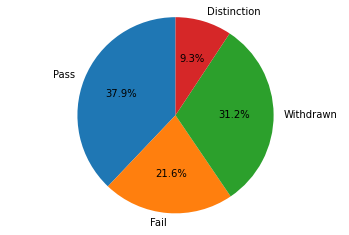

In [82]:
pass_perc = round((result_freqs[0] * 100), 1)
withdraw_perc = round((result_freqs[1] * 100), 1)
fail_perc = round((result_freqs[2] * 100), 1)
distinct_perc = round((result_freqs[3] * 100), 1)
results_percs = [pass_perc, fail_perc, withdraw_perc, distinct_perc]

labels = results
sizes = [15, 30, 45, 10]

fig1, ax1 = plt.subplots()
ax1.pie(results_percs, labels=results, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [83]:
neg_result = fail_perc + withdraw_perc
pos_result = pass_perc + distinct_perc
md(f'''
Here we can see that we have a negative result of withdrawing or failing **{neg_result}%** of the time,
with **{pos_result}%** of students achieving a positive result of passing or passing with distinction.
''')


Here we can see that we have a negative result of withdrawing or failing **52.8%** of the time,
with **47.2%** of students achieving a positive result of passing or passing with distinction.


**Numerical Values**

In [26]:
# show statistical breakdown of numerical values in student info
stud_info.describe(include='int64').round(1)

,attempts,credits,date_registration,date_unregistration
count,32593.0,32593.0,32548.0,10072.0
mean,0.2,79.8,-69.4,49.8
std,0.5,41.1,49.3,82.5
min,0.0,30.0,-322.0,-365.0
25%,0.0,60.0,-100.0,-2.0
50%,0.0,60.0,-57.0,27.0
75%,0.0,120.0,-29.0,109.0
max,6.0,655.0,167.0,444.0


In [28]:
# store the highest number of module previous attempts by students
max_attempts = stud_info['attempts'].max()
max_credits = stud_info['credits'].max()
min_credits = stud_info['credits'].min()
unreg_total = student_registration['date_unregistration'].count()
unreg_min = student_registration['date_unregistration'].min()
md(f'''
* Most students do not have a previous attempt, but there is a high of {max_attempts} attempts.
    * We can only have data for up to two of the students attempts since we only have two years worth of data.
* The maximum amount of credits a student took during the module was {max_credits}
    * This over twenty times the minimum of {min_credits} credits.
* It is unknown how these courses were weighted, but this amount of credits at the same time may have influenced student success
* There are {"{:,}".format(unreg_total)} values for of date_unregistration which represents the number of students who withdrew from the course.
* The earliest date_unregistration date is {unreg_min} days before the course began, which means this student did not make it to the first day. 
''')


* Most students do not have a previous attempt, but there is a high of 6 attempts.
    * We can only have data for up to two of the students attempts since we only have two years worth of data.
* The maximum amount of credits a student took during the module was 655
    * This over twenty times the minimum of 30 credits.
* It is unknown how these courses were weighted, but this amount of credits at the same time may have influenced student success
* There are 10,072 values for of date_unregistration which represents the number of students who withdrew from the course.
* The earliest date_unregistration date is -365.0 days before the course began, which means this student did not make it to the first day. 


**Early Withdrawals**

In [29]:
early_withdraws = stud_info.loc[stud_info['date_unregistration'] <= 0]
early_withdraws.head()

,module,presentation,id_student,region,imd,age,gender,education,disability,attempts,credits,result,date_registration,date_unregistration
125,AAA,2013J,292923,South East Region,90-100%,35-55,F,A Level or Equivalent,False,0,180,Withdrawn,-162,-121
136,AAA,2013J,305539,Wales,80-90%,0-35,F,Lower Than A Level,False,0,120,Withdrawn,-54,-3
198,AAA,2013J,405961,Scotland,90-100%,0-35,M,A Level or Equivalent,True,0,240,Withdrawn,-170,-100
256,AAA,2013J,1763015,Scotland,10-20%,35-55,F,A Level or Equivalent,False,0,60,Withdrawn,-58,-2
298,AAA,2013J,2318055,Wales,90-100%,35-55,M,A Level or Equivalent,False,0,60,Withdrawn,-56,-19


In [30]:
md(f'''
Here we can see the {"{:,}".format(len(early_withdraws))} students with a withdrawal date before the first day,
and it is tempting to remove them since students who never attended probably don't add much information, but let's look at their results:
''')


Here we can see the 3,097 students with a withdrawal date before the first day,
and it is tempting to remove them since students who never attended probably don't add much information, but let's look at their results:


In [31]:
dataframe(early_withdraws['result'].value_counts())

,result
Withdrawn,3089
Fail,8


In [32]:
md('''
It seems that while many of these students withdrew, there are those who still managed to fail, pass, and pass with distinction early.
Because of this we will keep all of the data. The registration and unregistration dates seem to have unusual data.
''')


It seems that while many of these students withdrew, there are those who still managed to fail, pass, and pass with distinction early.
Because of this we will keep all of the data. The registration and unregistration dates seem to have unusual data.


**Late Unregistration**

In [33]:
# finds the longest module length in courses and prints it
longest_course = courses['module_presentation_length'].max()
longest_unreg = int(student_registration['date_unregistration'].max())
md(f'''* The longest course from module_presentation length in the courses dataframe was {longest_course} days, yet we see here the latest unregistration date is {longest_unreg} days, which is longer than any course went on.
    ''')

* The longest course from module_presentation length in the courses dataframe was 269 days, yet we see here the latest unregistration date is 444 days, which is longer than any course went on.
    

**All Students with an unregistration point after 269 days:**

In [34]:
# finding students whose courses went on for longer than the maximum course length
student_registration.loc[student_registration['date_unregistration'] > 269]

,code_module,code_presentation,id_student,date_registration,date_unregistration
25249,FFF,2013J,586851,-22.0,444.0


* It seems to be just this one student is an outlier, but should not affect our overall analysis so we will leave this intact

**Modules**

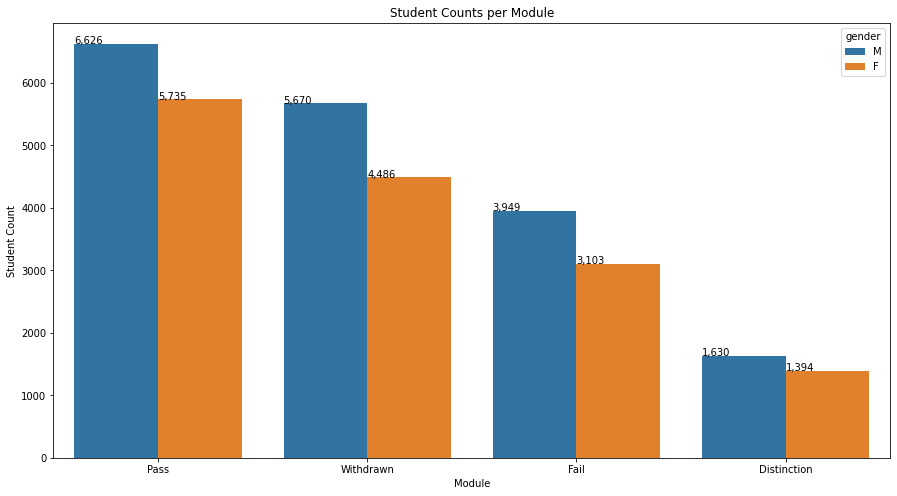

In [36]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='result', data=stud_info, hue='gender')
plt.title('Student Counts per Module')
plt.xlabel('Result')
plt.ylabel('Student Count')

for p in ax.patches:
        ax.annotate('{0:,.{1}f}'.format(p.get_height(), 0), (p.get_x(), p.get_height()))